In [4]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from AbundanceMatching import *
import numpy as np
import Corrfunc
from Corrfunc.theory import wp
from scipy.stats import multivariate_normal
from galaxy_statistics import generate_wp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Abundance Matching (SDSS) - M_star < -20 and <-18

In [16]:
data_path = '/u/ki/rmredd/data/'
# Luminosity function
lf_20 = np.loadtxt(data_path + 'lf/tinker/lf_jt_20.dat')
lf_19 = np.loadtxt(data_path + 'lf/tinker/lf_jt_19.dat')
lf_18 = np.loadtxt(data_path + 'lf/tinker/lf_jt_18.dat')
lf_18 = lf_18[lf_18[:,1]>0,:]

wp_path = '/u/ki/rmredd/data/corr_wp/tinker_sdss_wp/'
wp_20 = np.loadtxt(wp_path + 'wp_20.dat')
wp_20_cov_temp = np.loadtxt(wp_path + 'wp_covar_20.dat')
wp_20_cov = np.zeros((len(wp_20),len(wp_20)))
for wp_tup in wp_20_cov_temp:
    wp_20_cov[int(wp_tup[0])-1,int(wp_tup[1])-1] = wp_tup[2]
    wp_20_cov[int(wp_tup[1])-1,int(wp_tup[0])-1] = wp_tup[2]
    
wp_18 = np.loadtxt(wp_path + 'wp_18.dat')
wp_18_cov_temp = np.loadtxt(wp_path + 'wp_covar_18.dat')
wp_18_cov = np.zeros((len(wp_18),len(wp_18)))
for wp_tup in wp_18_cov_temp:
    wp_18_cov[int(wp_tup[0])-1,int(wp_tup[1])-1] = wp_tup[2]
    wp_18_cov[int(wp_tup[1])-1,int(wp_tup[0])-1] = wp_tup[2]
    
wp_21 = np.loadtxt(wp_path + 'wp_21.dat')
wp_21_cov_temp = np.loadtxt(wp_path + 'wp_covar_21.dat')
wp_21_cov = np.zeros((len(wp_21),len(wp_21)))
for wp_tup in wp_21_cov_temp:
    wp_21_cov[int(wp_tup[0])-1,int(wp_tup[1])-1] = wp_tup[2]
    wp_21_cov[int(wp_tup[1])-1,int(wp_tup[0])-1] = wp_tup[2]
    
r_cutoff = 15

wp_20_cov=wp_20_cov[wp_20[:,0]<r_cutoff,:]
wp_20_cov=wp_20_cov[:,wp_20[:,0]<r_cutoff]
wp_20_var = np.diag(wp_20_cov)
wp_20 = wp_20[wp_20[:,0]<r_cutoff]

wp_18_cov=wp_18_cov[wp_18[:,0]<r_cutoff,:]
wp_18_cov=wp_18_cov[:,wp_18[:,0]<r_cutoff]
wp_18_var = np.diag(wp_18_cov)
wp_18 = wp_18[wp_18[:,0]<r_cutoff]

wp_21_cov=wp_21_cov[wp_21[:,0]<r_cutoff,:]
wp_21_cov=wp_21_cov[:,wp_21[:,0]<r_cutoff]
wp_21_var = np.diag(wp_21_cov)
wp_21 = wp_21[wp_21[:,0]<r_cutoff]

box_size = 125
pimax = 40.0
scatters = [0.1,0.2,0.3]
deconv_repeat = 200
mag_cuts=[-21.0,-20.0,-18.0]

# Halos from n body sim
halo_path = '/nfs/slac/g/ki/ki21/cosmo/yymao/sham_test/resolution-test/c125-1024/'
halos = np.load(halo_path + 'hlist_1.00000.npy')

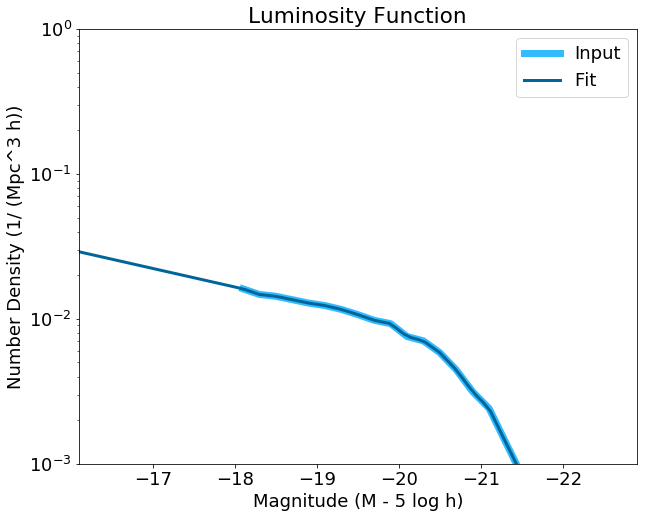

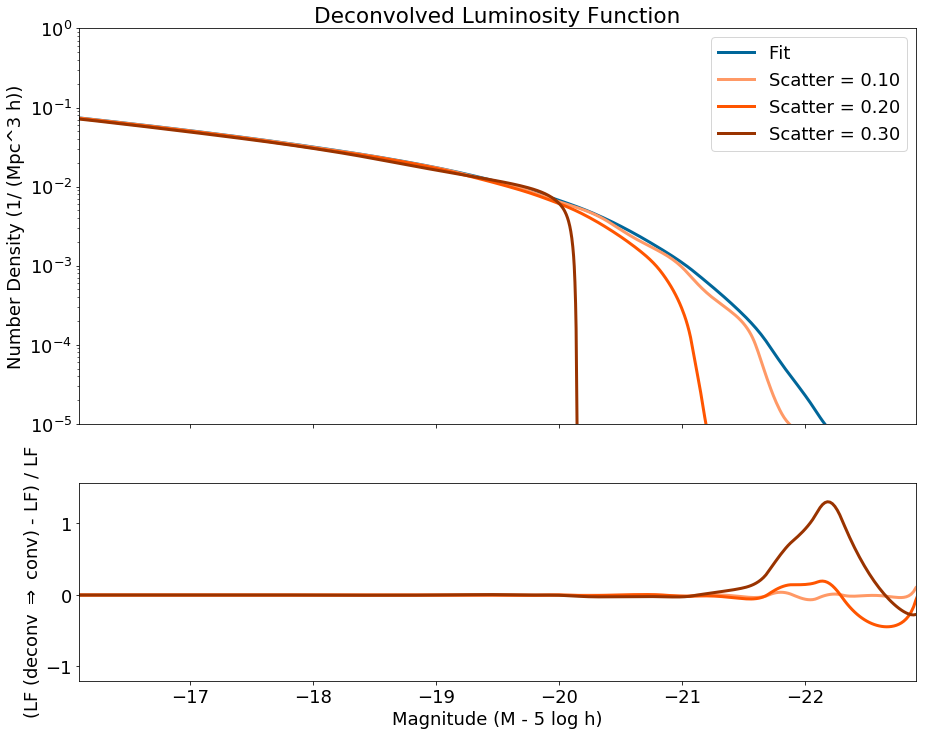

Scatter 0.10 catalog has 2125 galaxies
Scatter 0.20 catalog has 2125 galaxies
Scatter 0.30 catalog has 2125 galaxies
Scatter 0.10 catalog has 13079 galaxies
Scatter 0.20 catalog has 13079 galaxies
Scatter 0.30 catalog has 13079 galaxies
Scatter 0.10 catalog has 61955 galaxies
Scatter 0.20 catalog has 61955 galaxies
Scatter 0.30 catalog has 61955 galaxies


In [15]:
wp_binneds = generate_wp(lf_18,halos,'vpeak',wp_20[:,0],box_size,mag_cuts=mag_cuts,pimax=pimax,scatters=scatters,
                    deconv_repeat=deconv_repeat,verbose=True)

chi^2 is -134.515533


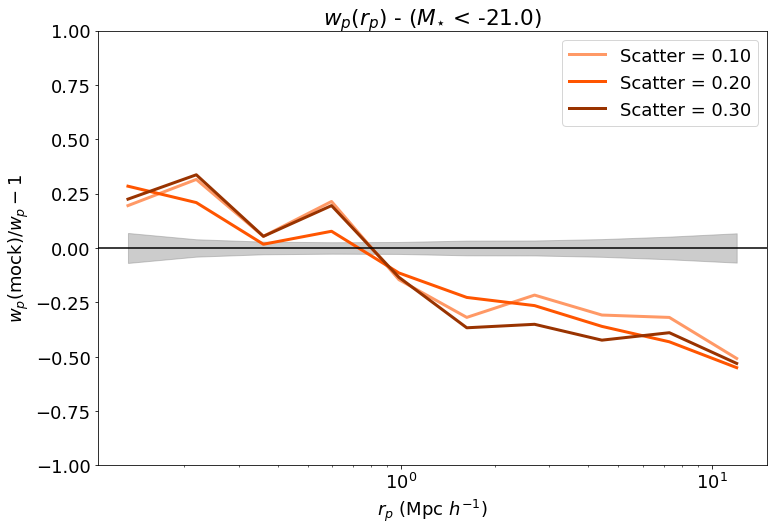

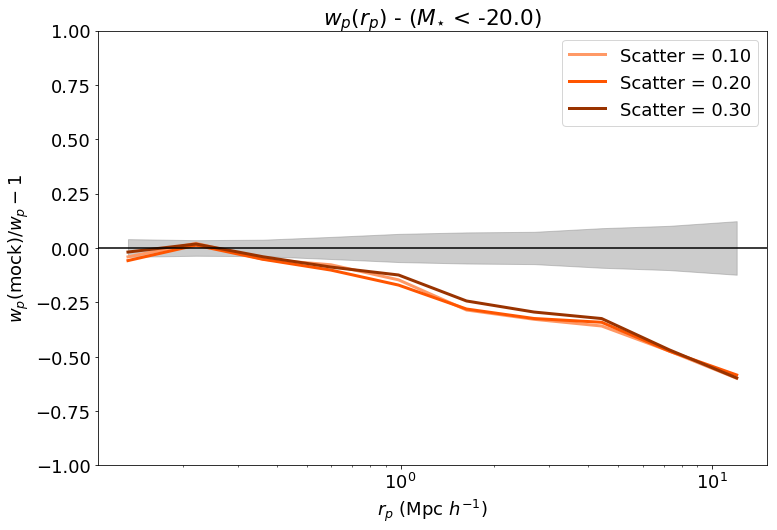

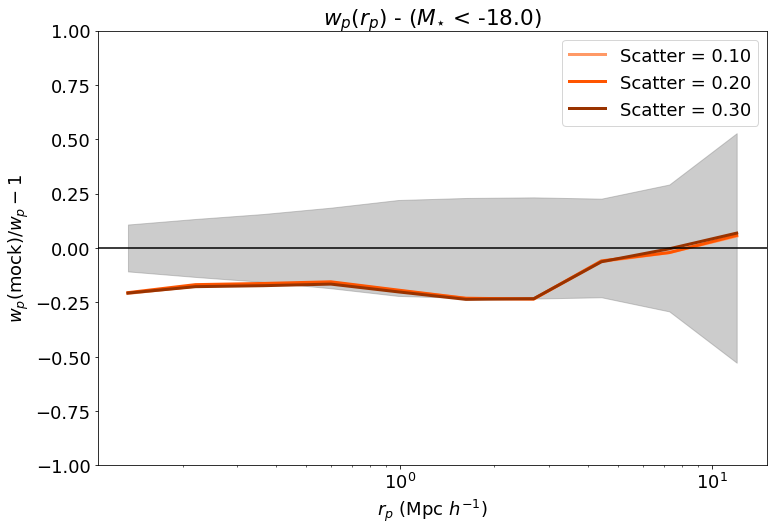

In [18]:
custom_blues_complement = ["#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300","#662200"]

# M_star < -21
plt.figure(figsize=(12,8))
legend = []
for wp_binned in wp_binneds[0]:
    plt.plot(wp_21[:,0],wp_binned/wp_21[:,1]-1,lw=3,c=custom_blues_complement[2*len(legend)])
    legend.append('Scatter = %.2f'%(scatters[len(legend)]))
plt.fill_between(wp_21[:,0],-np.sqrt(wp_21_var)/wp_21[:,1],np.sqrt(wp_21_var)/wp_21[:,1],alpha=0.4,color='grey')
plt.title('$w_p(r_p)$ - ($M_{\star}$ < %.1f)'%(mag_cuts[0]))
plt.legend(legend)
plt.ylabel('$w_p (\mathrm{mock}) / w_p - 1$')
plt.xlabel('$r_p \ (\mathrm{Mpc } \ h^{-1})$')
plt.ylim([-1,1])
plt.xscale('log')
plt.axhline(0,c='k')

# M_star < -20
plt.figure(figsize=(12,8))
legend = []
for wp_binned in wp_binneds[1]:
    plt.plot(wp_20[:,0],wp_binned/wp_20[:,1]-1,lw=3,c=custom_blues_complement[2*len(legend)])
    legend.append('Scatter = %.2f'%(scatters[len(legend)]))
plt.fill_between(wp_20[:,0],-np.sqrt(wp_20_var)/wp_20[:,1],np.sqrt(wp_20_var)/wp_20[:,1],alpha=0.4,color='grey')
plt.title('$w_p(r_p)$ - ($M_{\star}$ < %.1f)'%(mag_cuts[1]))
plt.legend(legend)
plt.ylabel('$w_p (\mathrm{mock}) / w_p - 1$')
plt.xlabel('$r_p \ (\mathrm{Mpc } \ h^{-1})$')
plt.ylim([-1,1])
plt.xscale('log')
plt.axhline(0,c='k')

# M_star < -18
plt.figure(figsize=(12,8))
legend = []
for wp_binned in wp_binneds[2]:
    plt.plot(wp_18[:,0],wp_binned/wp_18[:,1]-1,lw=3,c=custom_blues_complement[2*len(legend)])
    legend.append('Scatter = %.2f'%(scatters[len(legend)]))
plt.fill_between(wp_18[:,0],-np.sqrt(wp_18_var)/wp_18[:,1],np.sqrt(wp_18_var)/wp_18[:,1],alpha=0.4,color='grey')
plt.title('$w_p(r_p)$ - ($M_{\star}$ < %.1f)'%(mag_cuts[2]))
plt.legend(legend)
plt.ylabel('$w_p (\mathrm{mock}) / w_p - 1$')
plt.xlabel('$r_p \ (\mathrm{Mpc } \ h^{-1})$')
plt.ylim([-1,1])
plt.xscale('log')
plt.axhline(0,c='k')

print('chi^2 is %f'%(multivariate_normal.logpdf(wp_binned,wp_20[:,1],wp_20_cov)))

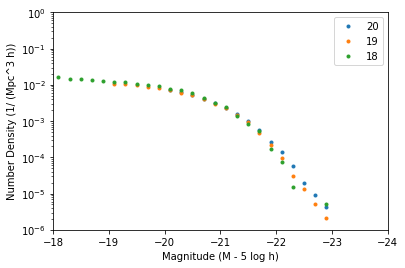

In [58]:
plt.plot(lf_20[:,0],lf_20[:,1],'.')
plt.plot(lf_19[:,0],lf_19[:,1],'.')
plt.plot(lf_18[:,0],lf_18[:,1],'.')
plt.ylim([1e-6,1])
plt.legend(['20','19','18'])
plt.yscale('log')
plt.xlabel('Magnitude (M - 5 log h)')
plt.ylabel('Number Density (1/ (Mpc^3 h))')
plt.xlim([-18,-24])
plt.show()

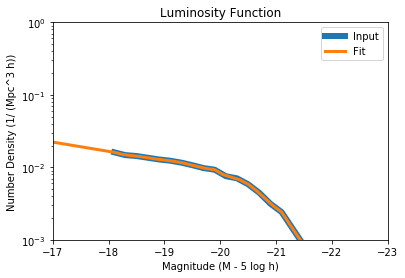

In [59]:
af = AbundanceFunction(lf_18[:,0], lf_18[:,1], (-25, -5))
plt.semilogy(lf_18[:,0], lf_18[:,1],lw=6)
x = np.linspace(-25, -10, 101)
plt.semilogy(x, af(x),lw=3)
plt.xlim([-17,-23])
plt.ylim([0.001,1])
plt.xlabel('Magnitude (M - 5 log h)')
plt.ylabel('Number Density (1/ (Mpc^3 h))')
plt.legend(['Input','Fit'])
plt.title('Luminosity Function')
plt.yscale('log')

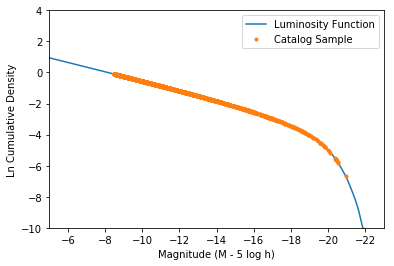

In [60]:
nd_halos = calc_number_densities(halos['vpeak'], 125)
catalog = af.match(nd_halos)
samp_rate = 1000
plt.ylim([-10,4])
plt.xlim([-5,-23])
plt.plot(af._x,af._nd_log)
plt.plot(catalog[::samp_rate],np.log(nd_halos)[::samp_rate],'.')
plt.ylabel('Ln Cumulative Density')
plt.xlabel('Magnitude (M - 5 log h)')
plt.legend(['Luminosity Function', 'Catalog Sample'])
plt.show()

In [81]:
box_size = 125.0
pimax = 40.0
nthreads = 4

# A luminosity cutoff to use for the correlation function. We will pick -20 to start
sub_catalog = catalog<-20.0
x = halos['x'][sub_catalog]
y = halos['y'][sub_catalog]
z = halos['z'][sub_catalog]

wp_20_cov=wp_20_cov[wp_20[:,0]<r_cutoff,:]
wp_20_cov=wp_20_cov[:,wp_20[:,0]<r_cutoff]
wp_20_var = np.diag(wp_20_cov)
wp_20 = wp_20[wp_20[:,0]<r_cutoff]

rbins = np.zeros(len(wp_20)+1)
rbins[1:-1] = 0.5*(wp_20[:-1,0]+wp_20[1:,0])
rbins[0] = 2*wp_20[0,0]-rbins[1]
rbins[-1] = 2*wp_20[-1,0]-rbins[-2]
wp_results = wp(box_size, pimax, nthreads, rbins, x, y, z, verbose=False, output_rpavg=True)
rp_avg = np.zeros(len(wp_results))
wp_binned = np.zeros(len(wp_results))
for i in range(len(wp_results)):
    rp_avg[i] = wp_results[i][2]
    wp_binned[i] = wp_results[i][3]

chi^2 is -69.231813


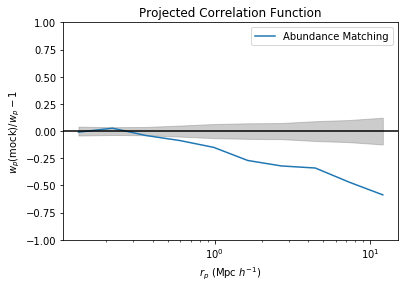

In [87]:
plt.plot(wp_20[:,0],wp_binned/wp_20[:,1]-1)
plt.fill_between(wp_20[:,0],-np.sqrt(wp_20_var)/wp_20[:,1],np.sqrt(wp_20_var)/wp_20[:,1],alpha=0.4,color='grey')
plt.title('Projected Correlation Function')
plt.legend(['Abundance Matching'])
plt.ylabel('$w_p (\mathrm{mock}) / w_p - 1$')
plt.xlabel('$r_p \ (\mathrm{Mpc } \ h^{-1})$')
plt.ylim([-1,1])
plt.xscale('log')
plt.axhline(0,c='k')
print('chi^2 is %f'%(multivariate_normal.logpdf(wp_binned,wp_20[:,1],wp_20_cov)))

In [84]:
generate_wp(lf_18,halos,'vpeak',wp_20[:,0],box_size,-20.0)-wp_binned

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [85]:
wp_20[:,0]-rp_avg

array([-0.00144918, -0.0166265 , -0.02603543, -0.04461851, -0.07352776,
       -0.12343051, -0.21350316, -0.36409623, -0.58455193, -0.134172  ])

## Test Abundance Matching

In [2]:
# Load halo list file with information about halos in the box

rt_path = '/nfs/slac/g/ki/ki21/cosmo/yymao/sham_test/resolution-test/c125-1024/'
halos = np.load(rt_path + 'hlist_1.00000.npy')
# halos.dtype.names

In [3]:
# Load luminosity function 
def lum_function(M,phi_star,alpha,M_star):
    n_den = 0.4*np.log(10)*phi_star*np.power(10,0.4*(alpha+1)*(M_star-M))*np.exp(-10**(0.4*(M_star-M)))
    return n_den
M_sun = 4.65
M_star = -2.5*9.77 + M_sun
alpha = -0.93
phi_star = 1.16
M = np.linspace(-27, -18, 101)+M_sun
lf = np.zeros((len(M),2))
lf[:,0] = M
lf[:,1] = lum_function(M,phi_star,alpha,M_star)

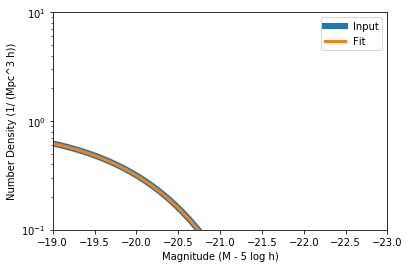

In [4]:
af = AbundanceFunction(lf[:,0], lf[:,1], (-25, -5))
plt.semilogy(lf[:,0], lf[:,1],lw=6)
x = np.linspace(-25, -10, 101)
plt.semilogy(x, af(x),lw=3)
plt.xlim([-19,-23])
plt.ylim([0.1,10])
plt.xlabel('Magnitude (M - 5 log h)')
plt.ylabel('Number Density (1/ (Mpc^3 h))')
plt.legend(['Input','Fit'])
plt.yscale('log')

In [5]:
# scatter = 0.04
# remainder = af.deconvolute(scatter*LF_SCATTER_MULT, 20)
# x, nd = af.get_number_density_table()
# plt.plot(x, remainder/nd)
# plt.xlabel('Magnitude')
# plt.ylabel('Remainder')
# plt.show()
# plt.plot(x,nd)
# plt.plot(af._x_deconv[float(scatter*LF_SCATTER_MULT)],nd)
# plt.xlabel('Magnitude')
# plt.ylabel('Number Density')
# plt.legend(['Original','Deconvolved'])
# plt.yscale('log')
# plt.show()

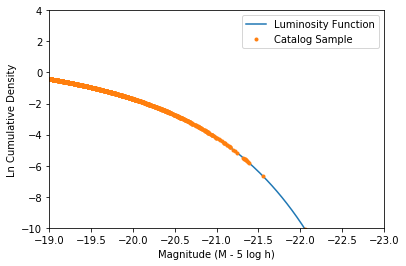

In [6]:
nd_halos = calc_number_densities(halos['vpeak'], 125)
catalog = af.match(nd_halos)
samp_rate = 1000
plt.ylim([-10,4])
plt.xlim([-19,-23])
plt.plot(af._x,af._nd_log)
plt.plot(catalog[::samp_rate],np.log(nd_halos)[::samp_rate],'.')
plt.ylabel('Ln Cumulative Density')
plt.xlabel('Magnitude (M - 5 log h)')
plt.legend(['Luminosity Function', 'Catalog Sample'])
plt.show()

## Test correlation function

In [21]:
box_size = 125.0
rmin = 0.1
rmax = 12
nbins = 20
pimax = 40.0
nthreads = 4

# A luminosity cutoff to use for the correlation function. We will pick -20 to start
sub_catalog = catalog>-20.0
x = halos['x'][sub_catalog]
y = halos['y'][sub_catalog]
z = halos['z'][sub_catalog]

rbins = np.logspace(np.log10(0.1), np.log10(rmax), nbins + 1)
wp_results = wp(box_size, pimax, nthreads, rbins, x, y, z, verbose=True, output_rpavg=True)

In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 20,20,3.  Time taken =   0.187 sec
countpairs_wp_double> gridlink seems inefficient. nmesh = (20, 20, 3); avg_np = 1.18e+03. Boosting bin refine factor - should lead to better performance
xmin = 0.000000 xmax=125.000000 rpmax = 12.000000
In gridlink_double> Running with [nmesh_x, nmesh_y, nmesh_z]  = 31,31,3.  Time taken =   0.292 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =     3 mins   52 secs


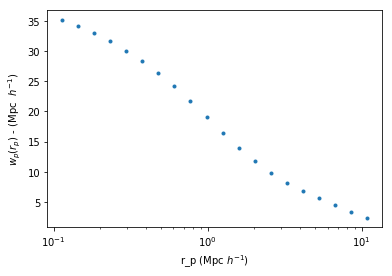

In [22]:
plt.plot(wp_results['rpavg'],wp_results['wp'],'.')
plt.ylabel('$w_p (r_p)$ - (Mpc  $h^{-1})$')
plt.xlabel('r_p (Mpc $ h^{-1}$)')
plt.xscale('log')